In [1]:
import logging
import math
import os
import sys
import shutil
from copy import deepcopy

import torch
import torch.nn.functional as F
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import os

In [2]:
!pip install -q lm-eval==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 84.2 MB/s eta 0:00:00:00:01


In [3]:
torch.cuda.empty_cache()

In [4]:
from lm_eval import evaluator, tasks, models

In [5]:
def evaluate_hf_model_pruned(model_name, tasks, num_fewshot=0):
    """
    It calls the evaluator to evaluate a model available on Hugging Face.

    Args:
    - model_name: The model name in hugging Face.
    - tasks: Tasks to evaluate.
    - num_fewshot: Number of examples of few-shot learning

    Returns:
    - metrics.
    """
    model_args = f"pretrained={model_name},offload_buffers=True,device_map='auto'"
    tasks = tasks

    results = evaluator.simple_evaluate(
      model="hf",
      model_args=model_args,
      tasks=tasks,
      num_fewshot=0,  # Number of few-shot smaples.
      limit=None,  # Use all the samples in the Evaluate Dataset.
      bootstrap_iters=10
    )

    metrics = results.get('results', {})
    return metrics

In [6]:
# Select tasks to evaluate.
tasks = ['lambada', 'boolq', 'arc_easy']

In [7]:
metrics_pruned = evaluate_hf_model_pruned("Shahrukh0/attnprun-llama-3.2-3B", tasks=tasks)
metrics_pruned

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.99k [00:00<?, ?B/s]

lambada_openai.py:   0%|          | 0.00/4.82k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/269M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2662 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4869 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

super_glue.py:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

The repository for super_glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/super_glue.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3245 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/9.00k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/331k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/346k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/86.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2251 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2376 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/570 [00:00<?, ? examples/s]

Running loglikelihood requests: 100%|██████████| 26347/26347 [35:57<00:00, 12.21it/s] 


bootstrapping for stddev: perplexity


100%|██████████| 1/1 [00:00<00:00, 77.85it/s]


bootstrapping for stddev: perplexity


100%|██████████| 1/1 [00:00<00:00, 85.02it/s]


{'arc_easy': {'alias': 'arc_easy',
  'acc,none': 0.7449494949494949,
  'acc_stderr,none': 0.008944265906130714,
  'acc_norm,none': 0.7167508417508418,
  'acc_norm_stderr,none': 0.009245632200075453},
 'boolq': {'alias': 'boolq',
  'acc,none': 0.7327217125382263,
  'acc_stderr,none': 0.00774005256694996},
 'lambada_openai': {'alias': 'lambada_openai',
  'perplexity,none': 3.941903711501125,
  'perplexity_stderr,none': 0.09037599385731623,
  'acc,none': 0.7046380749078207,
  'acc_stderr,none': 0.00635583158733314},
 'lambada_standard': {'alias': 'lambada_standard',
  'perplexity,none': 4.904746621407219,
  'perplexity_stderr,none': 0.15533631143297133,
  'acc,none': 0.6417620803415486,
  'acc_stderr,none': 0.006680129414466883}}

In [8]:
torch.cuda.empty_cache()

In [21]:
def evaluate_hf_model(model_name, tasks, num_fewshot=0):
    """
    It calls the evaluator to evaluate a model available on Hugging Face.

    Args:
    - model_name: The model name in hugging Face.
    - tasks: Tasks to evaluate.
    - num_fewshot: Number of examples of few-shot learning

    Returns:
    - metrics.
    """
    model_args = f"pretrained={model_name},offload_buffers=True,device_map='auto'"
    tasks = tasks

    results = evaluator.simple_evaluate(
      model="hf",
      model_args=model_args,
      tasks=tasks,
      num_fewshot=0,  # Number of few-shot smaples.
      limit=None,  # Use all the samples in the Evaluate Dataset.
      bootstrap_iters=10
    )

    metrics = results.get('results', {})
    return metrics

In [15]:
from huggingface_hub import login
login()

In [22]:
metrics_base= evaluate_hf_model("meta-llama/Llama-3.2-3B", tasks=tasks)
metrics_base

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Running loglikelihood requests: 100%|██████████| 26347/26347 [1:15:41<00:00,  5.80it/s]


bootstrapping for stddev: perplexity


100%|██████████| 1/1 [00:00<00:00, 71.24it/s]


bootstrapping for stddev: perplexity


100%|██████████| 1/1 [00:00<00:00, 72.97it/s]


{'arc_easy': {'alias': 'arc_easy',
  'acc,none': 0.7436868686868687,
  'acc_stderr,none': 0.008958775997918363,
  'acc_norm,none': 0.7159090909090909,
  'acc_norm_stderr,none': 0.009253921261885763},
 'boolq': {'alias': 'boolq',
  'acc,none': 0.7281345565749235,
  'acc_stderr,none': 0.007781715792283647},
 'lambada_openai': {'alias': 'lambada_openai',
  'perplexity,none': 3.948728914635304,
  'perplexity_stderr,none': 0.09051976860533245,
  'acc,none': 0.7001746555404619,
  'acc_stderr,none': 0.006383361452364427},
 'lambada_standard': {'alias': 'lambada_standard',
  'perplexity,none': 4.90659636080413,
  'perplexity_stderr,none': 0.15558583628981276,
  'acc,none': 0.6396274015136814,
  'acc_stderr,none': 0.0066888504143385805}}

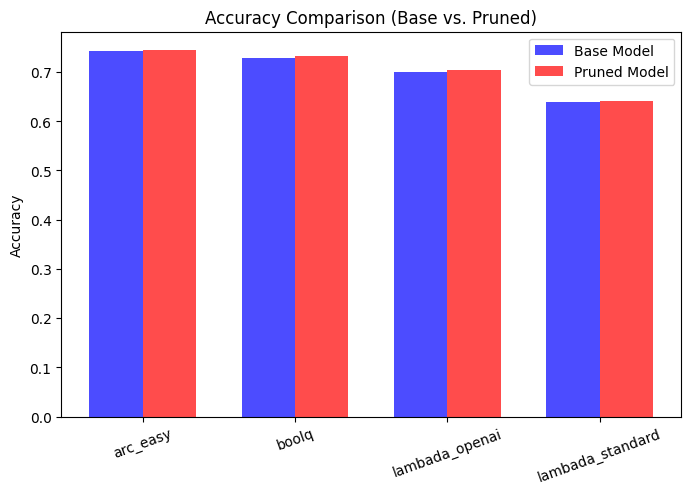

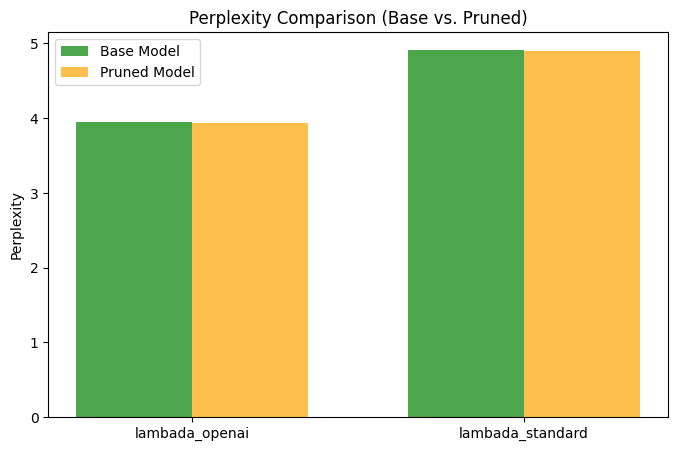

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_metrics(metrics_base, metrics_pruned):
    """
    Visualizes accuracy and perplexity before and after pruning.

    Parameters:
    - metrics_base: Dictionary of metrics for the base model
    - metrics_pruned: Dictionary of metrics for the pruned model
    """
    datasets = list(metrics_base.keys())

    # Extract accuracy values
    acc_base = [metrics_base[d].get('acc,none', None) for d in datasets]
    acc_pruned = [metrics_pruned[d].get('acc,none', None) for d in datasets]

    # Extract perplexity values (ignoring None values)
    datasets_ppl = [d for d in datasets if 'perplexity,none' in metrics_base[d]]
    ppl_base = [metrics_base[d]['perplexity,none'] for d in datasets_ppl]
    ppl_pruned = [metrics_pruned[d]['perplexity,none'] for d in datasets_ppl]

    # Bar Width
    bar_width = 0.35
    x = np.arange(len(datasets))

    # Plot Accuracy Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(x - bar_width/2, acc_base, bar_width, label="Base Model", color='blue', alpha=0.7)
    plt.bar(x + bar_width/2, acc_pruned, bar_width, label="Pruned Model", color='red', alpha=0.7)
    plt.xticks(x, datasets, rotation=20)
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison (Base vs. Pruned)")
    plt.legend()
    plt.show()

    # Plot Perplexity Comparison (Only for relevant datasets)
    if datasets_ppl:
        x_ppl = np.arange(len(datasets_ppl))
        plt.figure(figsize=(8, 5))
        plt.bar(x_ppl - bar_width/2, ppl_base, bar_width, label="Base Model", color='green', alpha=0.7)
        plt.bar(x_ppl + bar_width/2, ppl_pruned, bar_width, label="Pruned Model", color='orange', alpha=0.7)
        plt.xticks(x_ppl, datasets_ppl)
        plt.ylabel("Perplexity")
        plt.title("Perplexity Comparison (Base vs. Pruned)")
        plt.legend()
        plt.show()

# Call the function
visualize_metrics(metrics_base, metrics_pruned)